In [246]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import het_breuschpagan, het_white


In [188]:
days = 100
max_min = (20, 35)
temps = np.random.uniform(max_min[0], max_min[1], size=days)
ice_creams_sell = 50 + 4 * temps + np.random.randint(-20, 20, size=days)
ice_creams_sell = np.maximum(ice_creams_sell, 0)
df = pd.DataFrame({'temperature': temps, 'ice_creams_sell': ice_creams_sell})

In [189]:
df

,temperature,ice_creams_sell
0,26.967355,162.869421
1,21.773542,122.094168
2,23.504272,140.017089
3,22.128009,126.512036
4,25.427019,148.708074
...,...,...
95,24.068248,127.272992
96,21.482689,123.930757
97,26.043627,134.174507
98,28.377846,154.511386


## Lineariedade

In [190]:
px.scatter(df, x='temperature', y='ice_creams_sell', title="Venda de sorvetes", trendline='ols')

## Teste de homoscedasticidade

In [208]:
X, y = df.temperature, df.ice_creams_sell
X = sm.add_constant(X)
model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ice_creams_sell   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           9.75e-26
Time:                        16:12:44   Log-Likelihood:                -386.74
No. Observations:                 100   AIC:                             777.5
Df Residuals:                      98   BIC:                             782.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.0345      7.116      7.733      0.000      40.912      69.157
temperature     3.7174      0.260     14.307      0.000       3.202       4.233
==============================================================================
Omnibus:                       20.831   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.733
Skew:                           0.226   Prob(JB):                       0.0569
Kurtosis:                       1.917   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

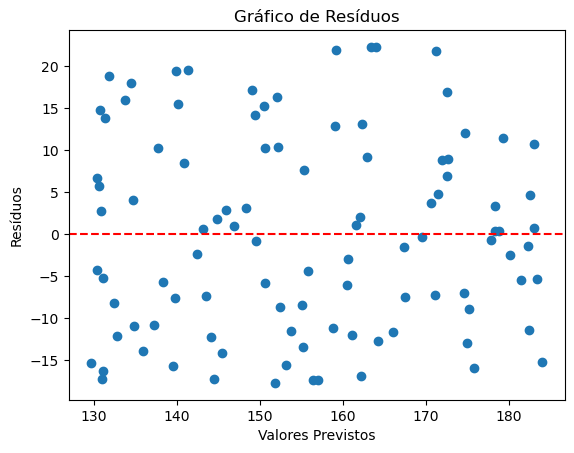

In [209]:
residuals = model.resid
plt.scatter(model.predict(), residuals)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Usandos testes estatisticos

In [193]:
bp_test = het_breuschpagan(model.resid, X)
print("Resultado do teste de Breusch-Pagan:")
print("Valor p:", bp_test[1])

Resultado do teste de Breusch-Pagan:
Valor p: 0.08424789049018125


In [194]:
# Teste de White
white_test = het_white(model.resid, X)
print("\nResultado do teste de White:")
print("Valor p:", white_test[1])


Resultado do teste de White:
Valor p: 0.07970657432629162


#### Exemplo aonde ocorre

In [203]:
# Gerando dados com heterocedasticidade
np.random.seed(0)
X = np.random.rand(100)
y = 2 * X + 1 + np.random.randn(100) * X  # Adicionando heterocedasticidade

# Ajustando um modelo de regressão linear
X_with_const = sm.add_constant(X)  # Adicionando uma coluna de 1s para o termo de interceptação
model = sm.OLS(y, X_with_const).fit()

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, X_with_const)
bp_value = bp_test[1]
print("Valor-p do teste de Breusch-Pagan:", bp_value)

# Teste de White
white_test = het_white(model.resid, X_with_const)
white_value = white_test[1]
print("Valor-p do teste de White:", white_value)


Valor-p do teste de Breusch-Pagan: 5.292829354268032e-07
Valor-p do teste de White: 2.0958622878357024e-06


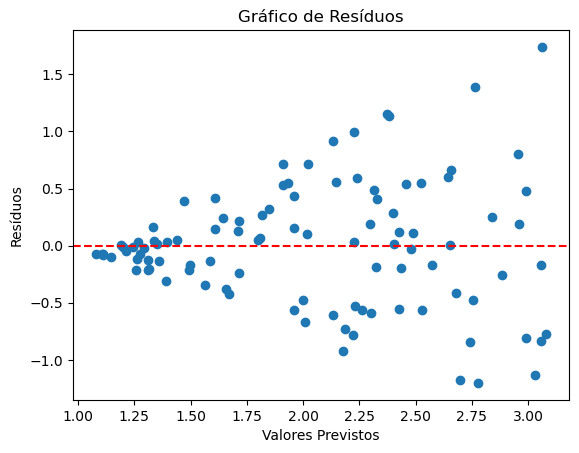

In [204]:
residuals = model.resid
plt.scatter(model.predict(), residuals)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Indempendecia dos erros

In [210]:
X, y = df.temperature, df.ice_creams_sell
X = sm.add_constant(X)
model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ice_creams_sell   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           9.75e-26
Time:                        17:08:56   Log-Likelihood:                -386.74
No. Observations:                 100   AIC:                             777.5
Df Residuals:                      98   BIC:                             782.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.0345      7.116      7.733      0.000      40.912      69.157
temperature     3.7174      0.260     14.307      0.000       3.202       4.233
==============================================================================
Omnibus:                       20.831   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.733
Skew:                           0.226   Prob(JB):                       0.0569
Kurtosis:                       1.917   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Gráfico de Resíduos versus Ordem de Observação')

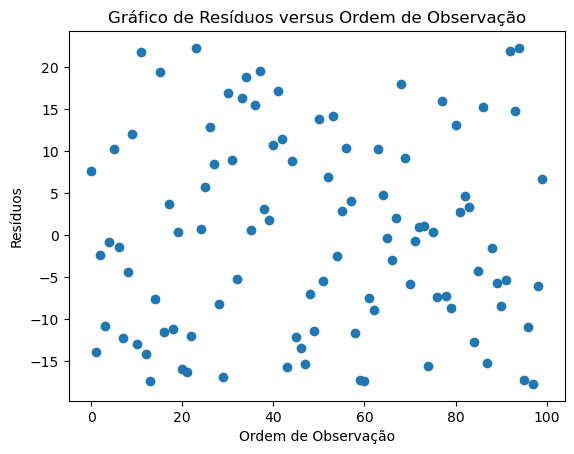

In [213]:
residuals = model.resid
plt.scatter(np.arange(len(residuals)), residuals)
plt.xlabel('Ordem de Observação')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos versus Ordem de Observação')

In [214]:
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Estatística de Durbin-Watson:", durbin_watson_statistic)

Estatística de Durbin-Watson: 1.7917589430170997


### Outro exemplo

Estatística de Durbin-Watson: 0.14614991605743838


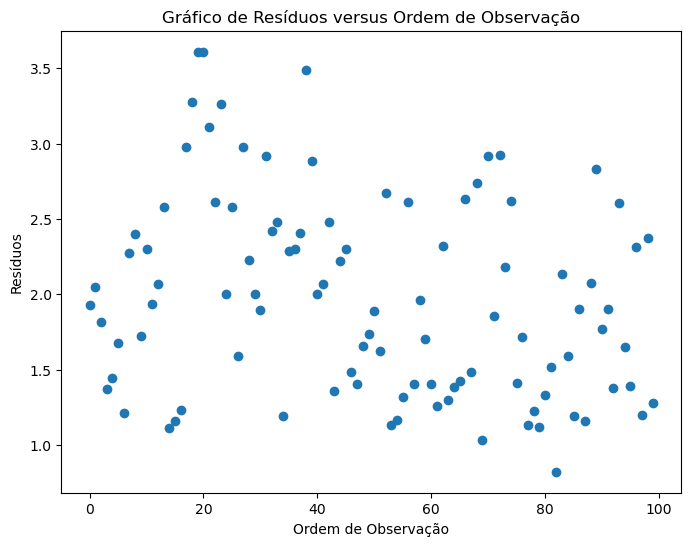

In [229]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerando dados com autocorrelação positiva
np.random.seed(0)
X = np.random.rand(100)
y = 2 * X + 1 + np.random.randn(100)

# Introduzindo autocorrelação positiva nos resíduos
residuals = sm.add_constant(np.random.randn(100))  # Resíduos independentes
for i in range(1, len(residuals)):
    residuals[i] = residuals[i-1] * 0.8 + residuals[i] * 0.2  # Autocorrelação positiva

# Ajustando um modelo de regressão linear
X_with_const = sm.add_constant(X)  # Adicionando uma coluna de 1s para o termo de interceptação
model = sm.OLS(y, X_with_const).fit()

# Adicionando os resíduos ao modelo
model_resid = model.predict(X_with_const) + residuals[:,1]

# Teste de Durbin-Watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model_resid)
print("Estatística de Durbin-Watson:", durbin_watson_statistic)

# Gráfico de resíduos versus ordem de observação
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(model_resid)), model_resid)
plt.xlabel('Ordem de Observação')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos versus Ordem de Observação')
plt.show()


In [227]:
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Estatística de Durbin-Watson:", durbin_watson_statistic)

Estatística de Durbin-Watson: 1.8857289064938574


## Normalidade dos residuos

In [249]:
X, y = df.temperature, df.ice_creams_sell
X = sm.add_constant(X)
model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ice_creams_sell   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           9.75e-26
Time:                        17:47:16   Log-Likelihood:                -386.74
No. Observations:                 100   AIC:                             777.5
Df Residuals:                      98   BIC:                             782.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.0345      7.116      7.733      0.000      40.912      69.157
temperature     3.7174      0.260     14.307      0.000       3.202       4.233
==============================================================================
Omnibus:                       20.831   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.733
Skew:                           0.226   Prob(JB):                       0.0569
Kurtosis:                       1.917   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
residuals = model.resid

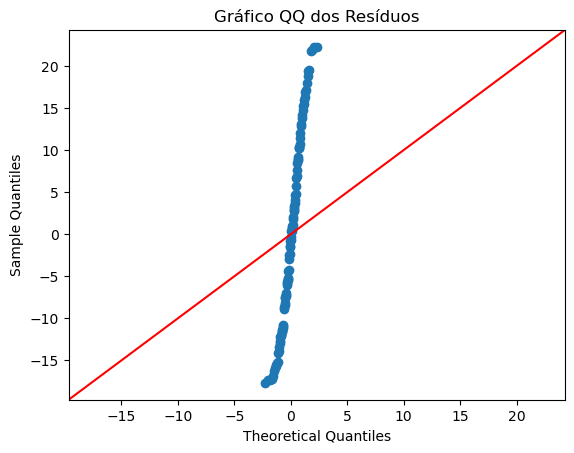

In [243]:
sm.qqplot(residuals, line ='45')
plt.title('Gráfico QQ dos Resíduos')
plt.show()

In [238]:
# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
shapiro_p_value = shapiro_test[1]
print("Valor-p do teste de Shapiro-Wilk:", shapiro_p_value)

Valor-p do teste de Shapiro-Wilk: 0.0013426210498437285


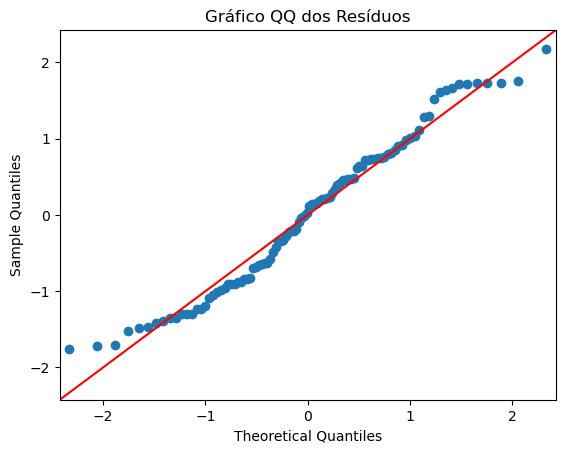

In [244]:
# Gerando dados
np.random.seed(0)
X = np.random.rand(100)
y = 2 * X + 1 + np.random.randn(100)

# Ajustando um modelo de regressão linear
X_with_const = sm.add_constant(X)  # Adicionando uma coluna de 1s para o termo de interceptação
model = sm.OLS(y, X_with_const).fit()

# Obtendo os resíduos
residuals = model.resid

# Gráfico de Probabilidade Normal (QQ plot)
sm.qqplot(residuals, line ='45')
plt.title('Gráfico QQ dos Resíduos')
plt.show()

# Teste de Shapiro-Wilk


In [245]:
shapiro_test = stats.shapiro(residuals)
shapiro_p_value = shapiro_test[1]
print("Valor-p do teste de Shapiro-Wilk:", shapiro_p_value)


Valor-p do teste de Shapiro-Wilk: 0.013686371967196465
